In [1]:
# !pip install kiwipiepy
# !pip install jamo

In [2]:
pwd

'c:\\Users\\user\\Desktop\\started_from_the_bottom\\FINAL'

In [3]:
import pandas as pd
import numpy as np
from functools import partial
from collections import defaultdict

from module.final import *

import warnings
warnings.filterwarnings("ignore")

In [4]:
WD = WordDict()
AL = Algorithm()

In [5]:
data = pd.read_excel('data./offerTrain.xlsx')

## 1. 표준화 사전 구축

In [6]:
# data['상품명'].apply(lambda x:len(x)).value_counts()

In [7]:
train = data[['상품명', '표준상품명']]
train.drop_duplicates(inplace=True)

In [8]:
train['상품명'] = train['상품명'].apply(AL.text_clean)

In [9]:
def bracket_clear(txt):
    txt = txt.replace('(', '')
    txt = txt.replace(')', '')
    if txt == '알수없음':
        return '-'
    return txt

In [10]:
train['표준상품명'] = train['표준상품명'].apply(bracket_clear)

In [11]:
train['상품명_길이'] = train['상품명'].apply(lambda x:len(x))
train['표준상품명_길이'] = train['표준상품명'].apply(lambda x:len(x))

train['상품명_요소'] = train['상품명'].apply(lambda x:len(x.split(' ')))
train['표준상품명_요소'] = train['표준상품명'].apply(lambda x:len(x.split(' ')))

train['길이차이'] = train['표준상품명_길이'] - train['상품명_길이']
train['요소차이'] = train['표준상품명_요소'] - train['상품명_요소']

In [12]:
cond1 = train['표준상품명'] != '-'
cond2 = train['표준상품명'] == '-'
option_11 = train[cond1]
option_12 = train[cond2]

In [13]:
cond1 = train['상품명_길이'] > 1
cond2 = train['표준상품명_길이'] > 1
train = train[cond1 & cond2]

## 1.1. 길이차이 0 인 경우

In [14]:
cond1 = train['길이차이'] == 0
cond2 = train['요소차이'] == 0
res_df_1 = train[cond1 & cond2]

In [15]:
# 표준화 사전에 집어넣기
res_df_121 = res_df_1[res_df_1['상품명'] == res_df_1['표준상품명']]
res_df_122 = res_df_1[res_df_1['상품명'] != res_df_1['표준상품명']]

In [16]:
res_df_121.sample(5)

,상품명,표준상품명,상품명_길이,표준상품명_길이,상품명_요소,표준상품명_요소,길이차이,요소차이
177408,미숫가루,미숫가루,4,4,1,1,0,0
207900,분모자 떡볶이,분모자 떡볶이,7,7,2,2,0,0
155620,마라샹궈,마라샹궈,4,4,1,1,0,0
120265,데미소다,데미소다,4,4,1,1,0,0
245199,시트러스 자몽 얼그레이,시트러스 자몽 얼그레이,12,12,3,3,0,0


In [17]:
for words in tqdm(res_df_121['표준상품명']):
    # print(words)
    wordsList = words.split(' ')
    for idx, word in enumerate(wordsList):
        # print(word)
        WD.updateDictonary(word, word, len(wordsList)-idx, type='c')

100%|██████████| 13453/13453 [00:50<00:00, 266.01it/s] 


In [18]:
WD.StandardDict['마카롱']

{'wordList': {'마카롱'},
 'idxList': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'mean': 1.0169491525423728}

In [19]:
def element_set(txt):
    return set(txt.split(' '))

In [20]:
def set_check(df, same):
    if same:
        res = df[df['상품명'].apply(element_set) == df['표준상품명'].apply(element_set)]
        return res
    res = df[df['상품명'].apply(element_set) != df['표준상품명'].apply(element_set)]
    return res

In [21]:
res_df_131 = set_check(res_df_122, True)
res_df_132 = set_check(res_df_122, False)

In [22]:
res_df_131.sample(5)

,상품명,표준상품명,상품명_길이,표준상품명_길이,상품명_요소,표준상품명_요소,길이차이,요소차이
307480,스프라이트 제로,제로 스프라이트,8,8,2,2,0,0
209912,쿠키 브라우니,브라우니 쿠키,7,7,2,2,0,0
127345,콜드브루 디카페인 라떼,디카페인 콜드브루 라떼,12,12,3,3,0,0
307598,웰치스 포도맛 제로,제로 웰치스 포도맛,10,10,3,3,0,0
407294,마카롱 한라봉,한라봉 마카롱,7,7,2,2,0,0


In [23]:
for words in tqdm(res_df_131['표준상품명']):
    # print(words)
    wordsList = words.split(' ')
    for idx, word in enumerate(wordsList):
        # print(word)
        WD.updateDictonary(word, word, len(wordsList)-idx, type='c')

100%|██████████| 157/157 [00:00<00:00, 1575.20it/s]


In [24]:
cond1 = res_df_132['상품명_요소'] == 1
res_df_141 = res_df_132[cond1]

In [25]:
for ori, std in tqdm(zip(res_df_141['상품명'], res_df_141['표준상품명'])):
    # print(std, ori)
    WD.updateDictonary(std, ori, 1, type='c')

669it [00:04, 136.76it/s]


In [26]:
cond1 = res_df_132['상품명_요소'] == 2
res_df_142 = res_df_132[cond1]

In [27]:
def ele_length_same(row):
    for origin, std in zip(row['상품명'].split(' '), row['표준상품명'].split(' ')):
        if len(origin) != len(std):
            return False
    return True

In [28]:
res_df_151 = res_df_142[res_df_142.apply(ele_length_same, axis=1) == True]
res_df_152 = res_df_142[res_df_142.apply(ele_length_same, axis=1) != True]

In [29]:
def set_cha(row):
    originSet = set(row['상품명'].split(' '))
    stdSet = set(row['표준상품명'].split(' '))
    x = list(originSet - stdSet)
    y = list(stdSet - originSet)
    # print(x, y)
    if len(x+y) == 2:
        return x[0], y[0]
    if len(x+y) == 3:
        return ' '.join(x), ' '.join(y)
    return None

In [30]:
res_df_151.sample(5)

,상품명,표준상품명,상품명_길이,표준상품명_길이,상품명_요소,표준상품명_요소,길이차이,요소차이
329916,초코 테린느,초코 케이크,6,6,2,2,0,0
194301,밤 까페라떼,밤 카페라떼,6,6,2,2,0,0
364474,카라멜 마키아또,캐러멜 마키아토,8,8,2,2,0,0
99858,깔루아 마끼야또,깔루아 마키아토,8,8,2,2,0,0
204154,복숭아 뚱카롱,복숭아 마카롱,7,7,2,2,0,0


In [31]:
idx = res_df_151.apply(set_cha, axis=1).notnull()
res = res_df_151.apply(set_cha, axis=1)[idx]

for ori, std in tqdm(zip(res.str[0], res.str[1])):
    # print(std, ori)
    WD.updateDictonary(std, ori, 1, type='c')


773it [00:03, 206.27it/s]


In [42]:
WD.StandardDict['리조또']

{'wordList': {'리조떡'}, 'idxList': [1], 'mean': 1.0}

## 1.2. 요소차이 1인 경우

In [33]:
cond1 = train['요소차이'] == -1
res_df_2 = train[cond1]

In [34]:
def element_join(row):
    if row['상품명'].replace(' ', '') == row['표준상품명'].replace(' ', ''):
        return True
    return False

In [35]:
res_df_221 = res_df_2[res_df_2.apply(element_join, axis=1) == True]

In [36]:
cond1 = res_df_221['상품명_요소'] == 2
res_df_2212 = res_df_221[cond1]
cond1 = res_df_221['상품명_요소'] == 3
res_df_2213 = res_df_221[cond1]
cond1 = res_df_221['상품명_요소'] == 4
res_df_2214 = res_df_221[cond1]

In [37]:
res

74963         (쥬스, 주스)
76001         (쥬스, 주스)
76077       (生연어, 생연어)
76489         (쥬스, 주스)
76495         (쥬스, 주스)
              ...     
427080      (쉐이크, 셰이크)
427082      (쉐이크, 셰이크)
427222    (카스테라, 카스텔라)
427313      (테린느, 케이크)
427333    (크로와상, 크루아상)
Length: 773, dtype: object

In [38]:
for df in [res_df_2212, res_df_2213]:
    idx = df.apply(set_cha, axis=1).notnull()
    res = df.apply(set_cha, axis=1)[idx]
    for ori, std in tqdm(zip(res.str[0], res.str[1])):
        # print(std, ori)
        WD.updateDictonary(std, ori, 1, type='c')

442it [00:03, 136.76it/s]
195it [00:01, 166.66it/s]


In [39]:
import pickle as pk

In [40]:
# save
with open('WD.StandardDict.p', 'wb') as f:
    pk.dump(WD.StandardDict, f)

# load
with open('WD.StandardDict.p', 'rb') as f:
    data = pk.load(f)

In [41]:
# save
with open('WD.WordToStandard.p', 'wb') as f:
    pk.dump(WD.WordToStandard, f)

# load
with open('WD.WordToStandard.p', 'rb') as f:
    data = pk.load(f)

In [53]:
res_df_121[['상품명','표준상품명']].sample(5)

,상품명,표준상품명
127748,딸기 그릭요거트,딸기 그릭요거트
424780,휘낭시에 시나몬,휘낭시에 시나몬
98559,김치찌개 정식,김치찌개 정식
356770,카페라떼,카페라떼
227060,생강 라떼,생강 라떼


In [54]:
res_df_131[['상품명','표준상품명']].sample(5)

,상품명,표준상품명
87213,골드메달 스파클링 애플 주스,골드메달 애플 스파클링 주스
123874,마카롱 돼지바,돼지바 마카롱
331808,머핀 초코칩,초코칩 머핀
266377,베이글 어니언,어니언 베이글
127345,콜드브루 디카페인 라떼,디카페인 콜드브루 라떼


In [55]:
res_df_141[['상품명','표준상품명']].sample(5)

,상품명,표준상품명
231764,슬러쉬,셰이크
260658,얼룩소프트,아이스크림
118326,닭도리탕,닭볶음탕
267051,오뎅,어묵
230267,샤인머스켓,샤인머스캣


In [56]:
res_df_151[['상품명','표준상품명']].sample(5)

,상품명,표준상품명
403205,풀드포크 부리또,풀드포크 부리토
362299,카라멜 다쿠아즈,캐러멜 다쿠아즈
177945,퐁숫가루 프라페,미숫가루 프라페
418631,헤이즐럿 라테,헤이즐넛 라떼
310845,조리퐁 쉐이크,죠리퐁 셰이크


In [62]:
ls=[]
for df in [res_df_2212, res_df_2213]:
    idx = df.apply(set_cha, axis=1).notnull()
    res = df.apply(set_cha, axis=1)[idx]
    ls.append(res)

In [67]:
for x, y in ls[0].unique()[:5]:
    print(x,'\t',y)

생고기 김치찌개 	 생고기김치찌개
생 자몽티 	 생자몽티
덮밥 가라아게 	 가라아게덮밥
가쓰오 장국 	 가쓰오장국
카츠 가지 	 가지카츠


In [68]:
for x, y in ls[1].unique()[:5]:
    print(x,'\t',y)

생 고구마 	 생고구마
생 딸기 	 생딸기
망고 생 	 생망고
생 복숭아 	 생복숭아
생 블루베리 	 생블루베리


In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

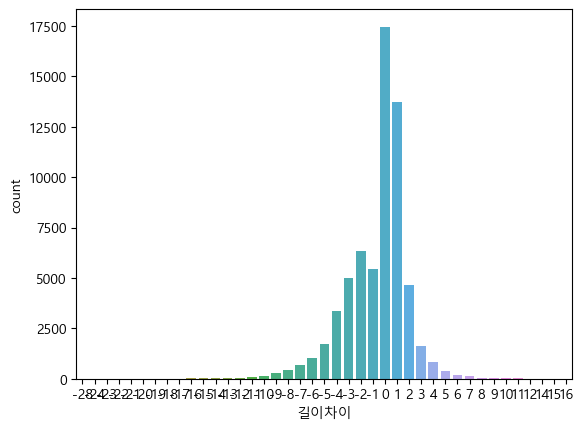

In [87]:
sns.countplot(train['길이차이']);

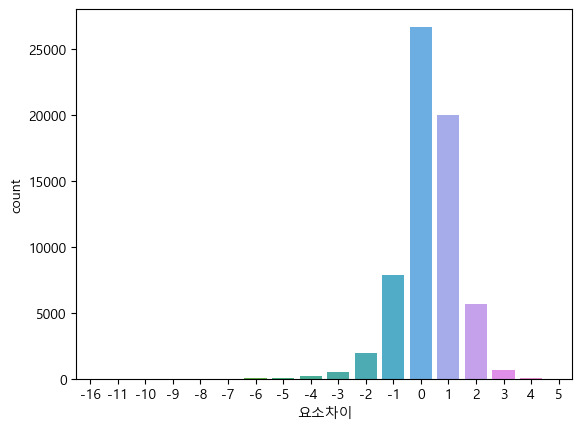

In [88]:
sns.countplot(train['요소차이']);

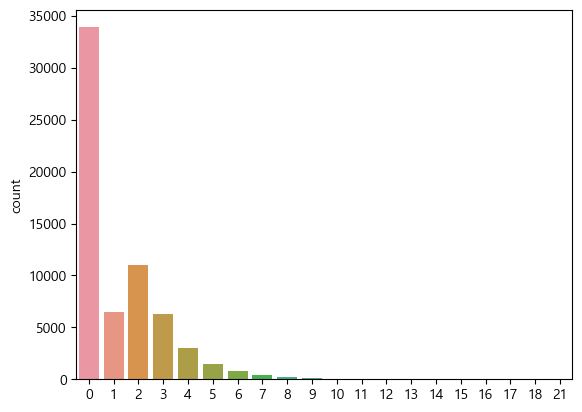

In [89]:
sns.countplot(abs(train['요소차이'] - train['길이차이']));

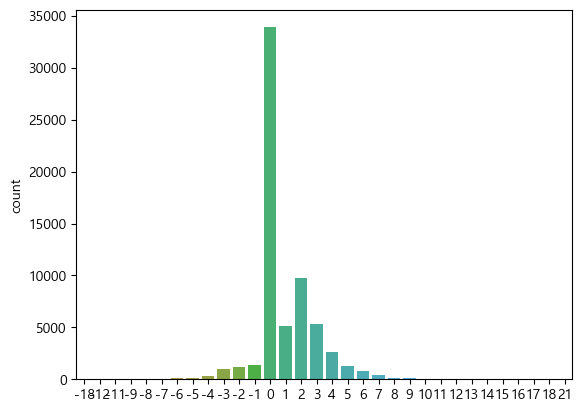

In [90]:
sns.countplot(train['요소차이'] - train['길이차이']);